In [35]:
import math as m
import numpy as np
from scipy.stats import norm

def blsprice(Price, Strike ,Rate, Time, Volatility):
    denomi = Volatility * m.sqrt(Time)  
    # calculating volatility times the square root of time
    numera = m.log(Price / Strike) + (Rate + 0.5 * Volatility ** 2 ) * Time
    d1 = numera / denomi
    d2 = d1 - denomi
    cdf1 = norm.cdf(d1) # calculating N(d1)
    cdf2 = norm.cdf(d2) # calculating N(d2)
    
    factor = m.exp(- Rate * Time)
    
    call = Price * cdf1 - Strike * factor * cdf2 # calculating the call option price 
    put = Strike * factor * (1 - cdf2) - Price * (1 - cdf1)
    # calculating the put option price 
    return call, put

In [39]:
from matplotlib import pyplot as plt

vol = 0.35
r = 0.07
T = 1.5
S0 = 100
S_init = 100
mu = 0.09
sim = 80000

def covered_call(K):
    interval = T / sim
    S = S0 * np.ones(sim)
    St = S * np.exp((mu - vol ** 2 / 2) * T + vol * m.sqrt(T) * np.random.normal(0,1,sim))
    valcall = blsprice(S0, K, r, T, vol)[0] * m.exp(r * T)
    V = St + valcall - np.maximum(0, St - K)
    
    R = np.log(V/S0)
    R = np.sort(R)
    mean = np.mean(R)
    sd = np.std(R)
    VAR = np.quantile(R, 0.05)
    cVAR = np.mean(R[R<=VAR])
    return mean, sd, VAR, cVAR, R
    

sim1 = covered_call(101)
sim2 = covered_call(115)
sim3 = covered_call(130)


print("Strike price \t mean \t\t median \t 95% VAR \t 95% cVAR")
print("101 \t %0.7f \t\t %0.7f \t\t %0.7f \t\t %0.7f" % (sim1[0], sim1[1], sim1[2], sim1[3]))
print("115 \t %0.7f \t\t %0.7f \t\t %0.7f \t\t %0.7f" % (sim2[0], sim2[1], sim2[2], sim2[3]))
print("130 \t %0.7f \t\t %0.7f \t\t %0.7f \t\t %0.7f" % (sim3[0], sim3[1], sim3[2], sim3[3]))


Strike price 	 mean 		 median 	 95% VAR 	 95% cVAR
101 	 0.1002705 		 0.1795141 		 -0.2911139 		 -0.4100546
115 	 0.0955998 		 0.2283882 		 -0.3690331 		 -0.4973321
130 	 0.0863772 		 0.2774123 		 -0.4478693 		 -0.5871647


Text(0.5, 1.0, 'Covered call strategy: K = 130 Probability density function of log return')

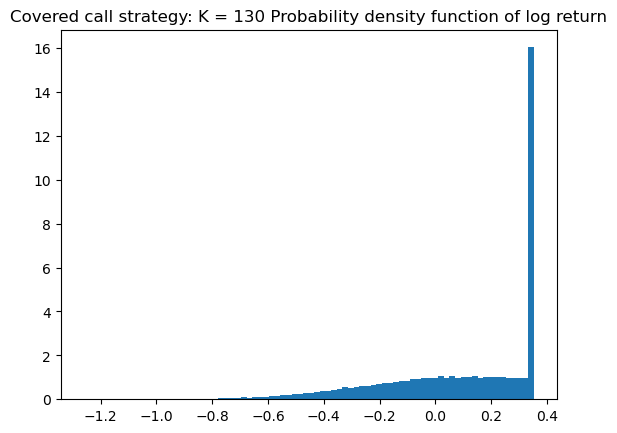

In [40]:
plt.hist(sim3[4], bins = 80, density = True)
plt.title("Covered call strategy: K = 130 Probability density function of log return")

The probability density function is presenting a left tail, and it has most frequency occurred beyong 0.0, especially at around 0.34. 